# Time Series Forcasting For the A51 in Darmstadt Aka Roßdörfer Platz

### Importing The library Required 

In [1]:
import warnings; 
warnings.simplefilter('ignore')
# %pip install pystan
# %pip install fbprophet

In [2]:

%pip install Prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data 

In [4]:
## 1-  Loading the Data of A51 
df = pd.read_csv(r"C:\A\Master Darmstadt\AIBI\Task\A51.csv", delimiter=";")
df.head()

,Datum,Uhrzeit,Bezeichnung,Intervall,D21Z,D21B,D22Z,D22B,D23Z,D23B,...,TB38Z,TB38B,TB39Z,TB39B,TB41Z,TB41B,ST58Z,ST58B,ST59Z,ST59B
0,01.01.2023,10:11,A 51,1,0,0,2,86,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01.01.2023,10:10,A 51,1,0,0,1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01.01.2023,10:09,A 51,1,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01.01.2023,10:08,A 51,1,0,0,1,19,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01.01.2023,10:07,A 51,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Cleansing

In [5]:
df = df.drop(columns=["Intervall","Bezeichnung"])
# Create a boolean mask
mask = [not col.endswith('B') for col in df.columns] #according to the source of the Data the Columns that end with B is Time share with sensor deflection so it will be deleted  
# Use the mask to filter the DataFrame
df = df.filter(items=df.columns[mask])
df.head()

,Datum,Uhrzeit,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,...,TF39Z,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z
0,01.01.2023,10:11,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,01.01.2023,10:10,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,01.01.2023,10:09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01.01.2023,10:08,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01.01.2023,10:07,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

df['Time'] = df[['Datum', 'Uhrzeit']].apply(lambda x: ' '.join(x), axis=1)
df['Time'] = pd.to_datetime(df['Time'])
df.head()

,Datum,Uhrzeit,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,...,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z,Time
0,01.01.2023,10:11,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2023-01-01 10:11:00
1,01.01.2023,10:10,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2023-01-01 10:10:00
2,01.01.2023,10:09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-01-01 10:09:00
3,01.01.2023,10:08,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-01-01 10:08:00
4,01.01.2023,10:07,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-01-01 10:07:00


In [7]:
df['Sum'] = df.iloc[:, 1:].sum(axis=1)
df.tail()

,Datum,Uhrzeit,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,...,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z,Time,Sum
500907,01.01.2022,09:16,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2022-01-01 09:16:00,4
500908,01.01.2022,09:15,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,2022-01-01 09:15:00,5
500909,01.01.2022,09:14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2022-01-01 09:14:00,0
500910,01.01.2022,09:13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2022-01-01 09:13:00,3
500911,01.01.2022,09:12,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2022-01-01 09:12:00,2


In [8]:
df = df.drop(columns=["Datum","Uhrzeit"])


df.set_index('Time', inplace=True)
df.tail()

,D21Z,D22Z,D23Z,V24Z,V25Z,V26Z,D81Z,V82Z,D91Z,V92Z,...,TF41Z,TB32Z,TB35Z,TB37Z,TB38Z,TB39Z,TB41Z,ST58Z,ST59Z,Sum
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 09:16:00,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2022-01-01 09:15:00,0,0,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,5
2022-01-01 09:14:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-01 09:13:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2022-01-01 09:12:00,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [9]:
df.drop(df.columns.difference(['Time','Sum']), 1, inplace=True)

df.head()

,Sum
Time,
2023-01-01 10:11:00,7
2023-01-01 10:10:00,4
2023-01-01 10:09:00,0
2023-01-01 10:08:00,1
2023-01-01 10:07:00,2


### Deleting of the Outliers 

In [10]:
def remove_outliers(df):
    # calculate the IQR for each column in the DataFrame
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # define the lower and upper bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # create a boolean mask for the outlier rows in the DataFrame
    outlier_mask = ~df.apply(lambda x: ((x < lower_bound) | (x > upper_bound)).any(), axis=1)

    # select the rows without outliers
    df_clean = df[outlier_mask]
    
    return df_clean


In [11]:
df1 = remove_outliers(df)


In [12]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    df['hours']= df.index.hour
    df['dayofweek'] = df.index.dayofweek
    #df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df1 = create_features(df)
df1.head()

,Sum,hours,dayofweek,month,dayofyear,dayofmonth,weekofyear
Time,,,,,,,
2023-01-01 10:11:00,7,10,6,1,1,1,52
2023-01-01 10:10:00,4,10,6,1,1,1,52
2023-01-01 10:09:00,0,10,6,1,1,1,52
2023-01-01 10:08:00,1,10,6,1,1,1,52
2023-01-01 10:07:00,2,10,6,1,1,1,52


# Resmaple the Data to be the Data 

In [13]:
# due to the Amount of the Data i want to use a smaller amount so i Resample the Data with Daily Traffic and not with Hourly Data 
df = df.resample('D').sum()
df.head()

,Sum
Time,
2022-01-01,19996
2022-01-02,37186
2022-01-03,28235
2022-01-04,34317
2022-01-05,113428


### **Outlier**

In [14]:
df = remove_outliers(df)

In [15]:
dfarima = df
%store dfarima

Stored 'dfarima' (DataFrame)


In [16]:
#  uncomment this before give it
# sns.pairplot(df1.dropna(),
# hue='Sum',
# x_vars=['hours','dayofweek',
# 'month','dayofyear','dayofmonth',
# 'weekofyear'],
# y_vars='Sum',
# height=5,
# plot_kws={'alpha':0.15, 'linewidth':0}
# )
# plt.suptitle('Sum by Hour, Day of Week, Month, Day of Year, Day of Month and Week of Year')
# plt.show()

In [17]:
# Check correlation




### Data  Visualization 

<Figure size 1000x1000 with 0 Axes>

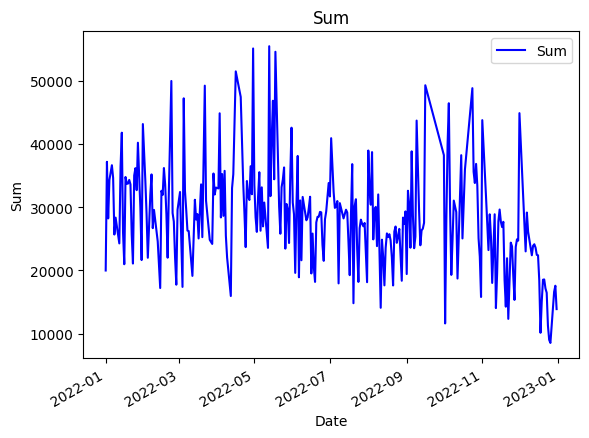

In [18]:

plt.figure(figsize=(10, 10))
# Create a line plot of the 'Sum' column
df.plot(kind='line', y='Sum', color='blue')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Sum')

# Show the plot
plt.show()

In [19]:
df.size

292

In [20]:
df.size

292

### Outlier 

In [21]:


# calculate the IQR for each column in the DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# create a boolean mask for the outlier rows in the DataFrame
outlier_mask = ~df.apply(lambda x: ((x < lower_bound) | (x > upper_bound)).any(), axis=1)

# select the rows without outliers
df_clean = df[outlier_mask]
df_clean.size
df= df_clean

In [22]:
df.size

277

In [23]:
df= df.reset_index()
df.columns = ["ds",'y']
df.head()

,ds,y
0,2022-01-01,19996
1,2022-01-02,37186
2,2022-01-03,28235
3,2022-01-04,34317
4,2022-01-06,36647


In [24]:
# Prophet model for time series forecast
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# Visualization
import plotly.graph_objs as go

In [25]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      277 non-null    datetime64[ns]
 1   y       277 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


# Train Test Split

In [26]:
# Train test split
df_train = df[df['ds']<='2022-11-30']
df_test = df[df['ds']>'2022-11-30']

# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['ds'].min(), 'to', df_train['ds'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['ds'].min(), 'to', df_test['ds'].max())

The training dataset has 256 records, ranging from 2022-01-01 00:00:00 to 2022-11-30 00:00:00
The testing dataset has 21 records, ranging from 2022-12-01 00:00:00 to 2022-12-31 00:00:00


## polting the Trainging and Test Set 

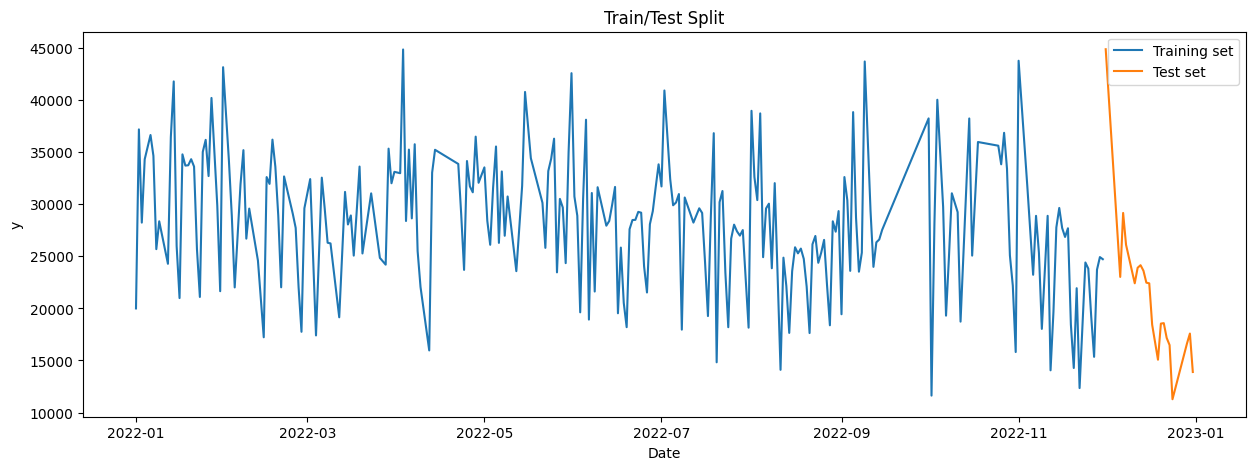

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_train['ds'], df_train['y'], label='Training set')
plt.plot(df_test['ds'], df_test['y'], label='Test set')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.show()

### **Train Time Series Model Using Prophet**

 we will train the time series model using the training dataset. 

`interval_width` specifies the prediction interval. We changed the default value of 80% to 95% prediction interval. It makes the upper bound and the lower bound of the prediction broader.

`n_changepoints` is the number of change points in the time series trend. The default value is 25. Based on the shape of the the data, it was set at 7.

In [28]:
# Create the prophet model with confidence internal of 95%
m = Prophet(interval_width=0.95, n_changepoints=7)

# Fit the model using the training dataset
m.fit(df_train)

11:59:17 - cmdstanpy - INFO - Chain [1] start processing
11:59:17 - cmdstanpy - INFO - Chain [1] done processing


### Use Prophet Model To Make Prediction

In [29]:
# Create a future dataframe for prediction
future = m.make_future_dataframe(periods=31)

# Forecast the future dataframe values
forecast = m.predict(future)

forecast.head()
# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
282,2022-12-27,27411.681304,15759.168842,38070.318414
283,2022-12-28,24922.153876,14174.097337,35651.660401
284,2022-12-29,26280.516151,15797.751859,37416.837293
285,2022-12-30,25177.006722,13869.954026,37137.040352
286,2022-12-31,22992.934383,11923.141068,34149.548369


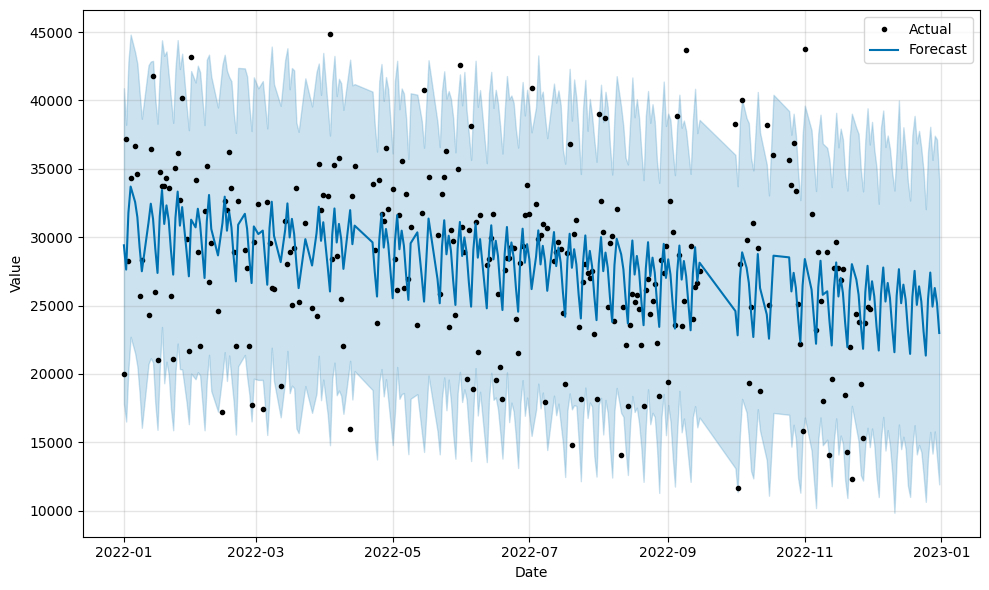

In [30]:
from prophet.plot import plot
fig = plot(m, forecast, xlabel='Date', ylabel='Value')

# Add a legend
fig.gca().legend(['Actual', 'Forecast'])

# Display the plot
fig.show()

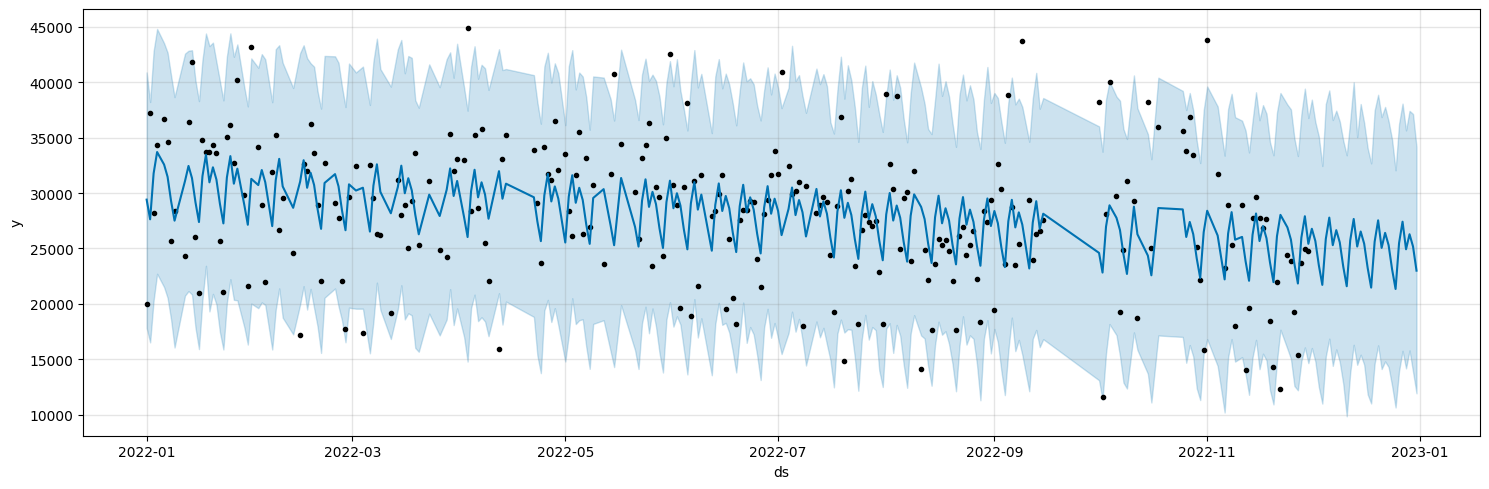

In [31]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(forecast,
                 ax=ax)
plt.show()

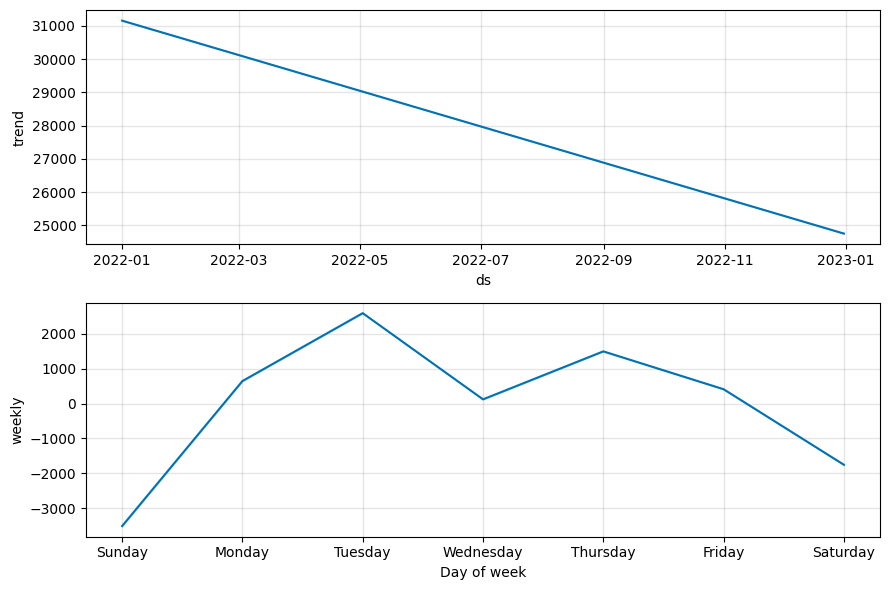

In [32]:
fig = m.plot_components(forecast)

# Visualize the forecast

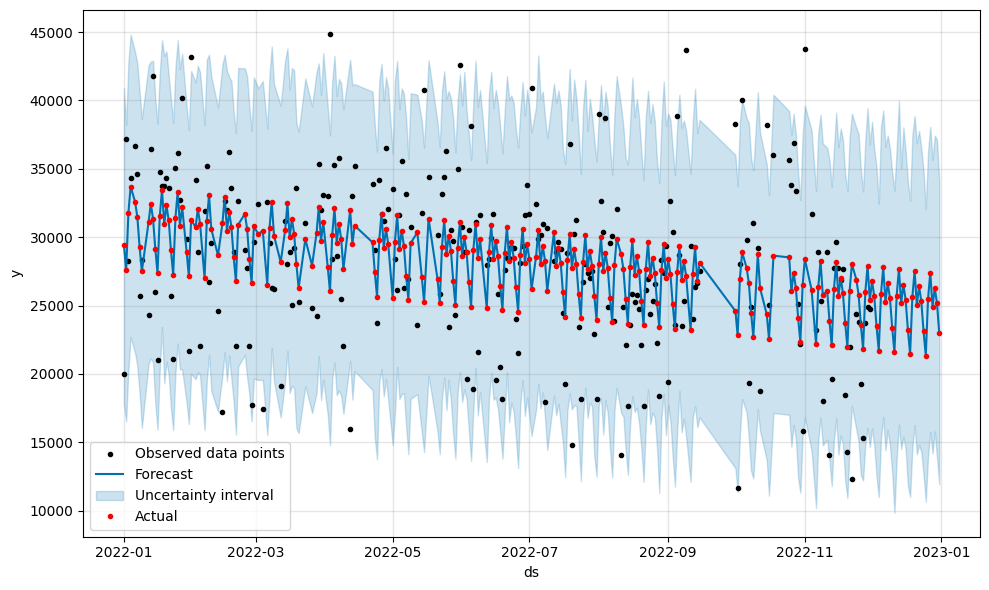

In [33]:

fig = m.plot(forecast)
ax = fig.gca()
ax.plot(forecast["ds"], forecast["yhat"], 'r.', label="Actual")
ax.legend()

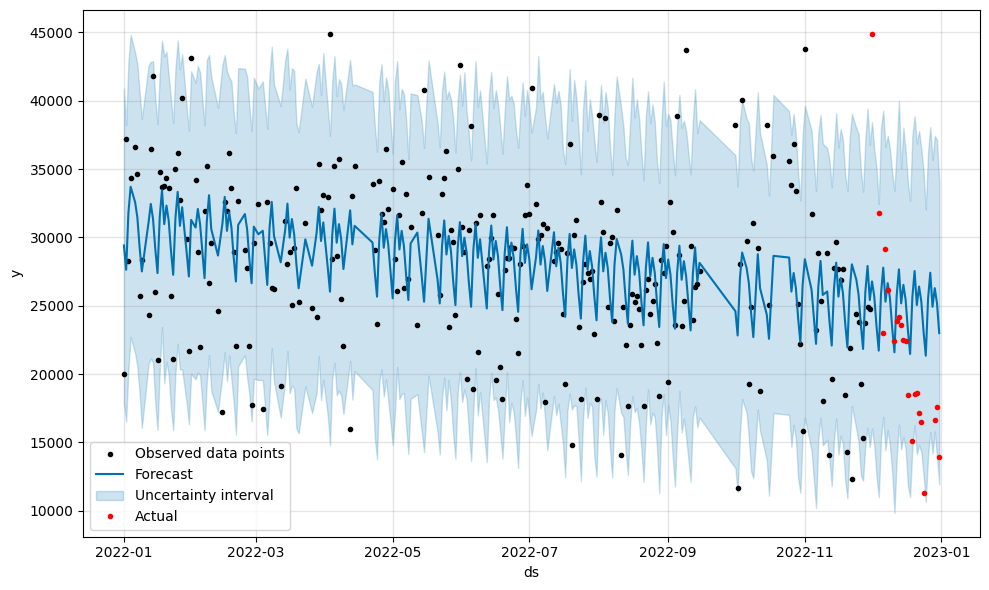

In [34]:
# Visualize the forecast
fig = m.plot(forecast)
ax = fig.gca()
ax.plot(df_test["ds"], df_test["y"], 'r.', label="Actual")
ax.legend()


### Identify Change Points

In [35]:
# Default change points
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')

There are 7 change points. 
The change points dates are 
            ds      y
29  2022-02-04  22013
58  2022-03-17  25067
87  2022-05-01  33539
116 2022-06-06  18925
145 2022-07-08  17959
174 2022-08-08  23852
203 2022-09-07  23524


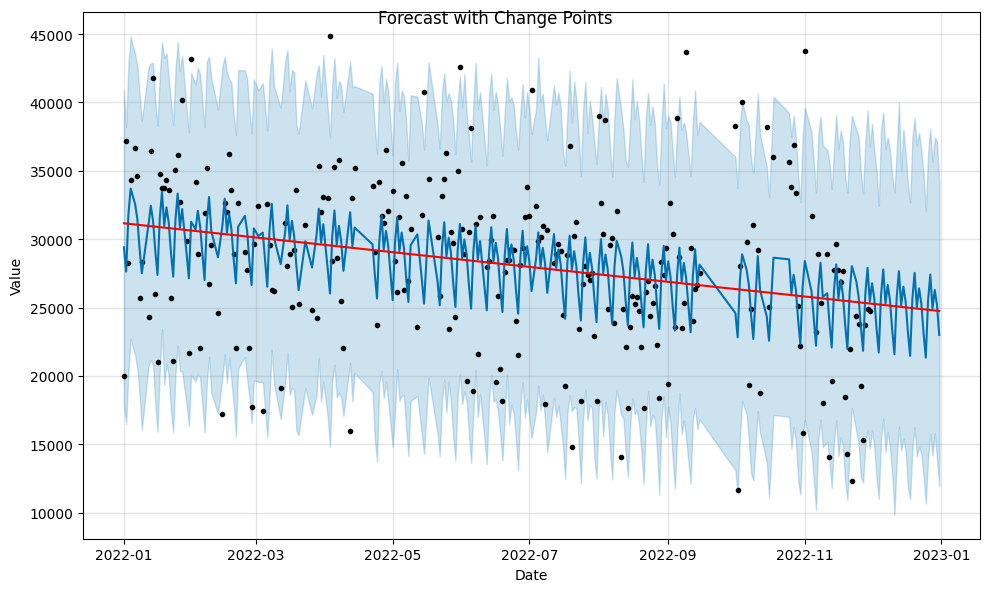

In [36]:
# Change points to plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
# add x-axis and y-axis labels
fig.gca().set_xlabel('Date')
fig.gca().set_ylabel('Value')

# set the title for the plot
fig.suptitle('Forecast with Change Points')

# show the plot
plt.show()

### Cross Validation

 I do cross-validation for the time series model. Prophet has a `cross_validation` function to automate the comparison between the actual and the predicted values.
* `m''` is the trained model.
* `initial='300 days'` means the initial model will be trained on the first '`300 days'` of data.
* `period='30 days'` means 30 days will be added to the training dataset for each additional model.
* `horizon = '30 days'` means that the model forecasts the next 30 days. When only `horizon` is given, Prophet defaults `initial` to be triple the `horizon`, and `period` to be half of the `horizon`.
* `parallel="processes"` enables parallel processing for cross-validation. When the parallel cross-validation can be done on a single machine, "processes" provide the highest performance.

In [37]:
# Cross validation
df_cv = cross_validation(m, initial='300 days', period='30 days', horizon = '30 days', parallel="processes")
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-11-01,29151.971772,18057.095173,40628.468465,43777,2022-10-31
1,2022-11-04,26563.369737,16230.983602,38160.290593,31722,2022-10-31
2,2022-11-06,23380.559106,12356.306402,33986.856477,23227,2022-10-31
3,2022-11-07,27146.587353,16337.211669,37978.855956,28886,2022-10-31
4,2022-11-08,29059.354179,18038.658059,41133.329893,25325,2022-10-31


In [38]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
20,2022-11-26,24978.643919,14376.082103,35092.652987,19244,2022-10-31
21,2022-11-27,23102.706326,11792.466449,33390.505122,15349,2022-10-31
22,2022-11-28,26868.734573,15128.524928,38412.825910,23720,2022-10-31
23,2022-11-29,28781.501399,17928.006730,39347.215202,24925,2022-10-31
24,2022-11-30,26437.889463,15276.504032,37356.310870,24723,2022-10-31


# Model performance metrics

**horizon**: The number of days into the future being forecasted.

**MSE**: `Mean squared error`, which measures the average of the squared differences between the predicted values and the actual values.

**RMSE**: `Root mean squared error`, which is the square root of MSE.`

**MAE**: `Mean absolute error`, which measures the average absolute difference between the predicted values and the actual values.

**MAPE**: `Mean absolute percentage error`, which measures the average percentage difference between the predicted values and the actual values.

**MdAPE**: `Median absolute percentage error`, which is the median of the absolute percentage differences between the predicted values and the actual values.

**sMAPE**: `Symmetric mean absolute percentage error`, which is a symmetric version of MAPE that gives equal weight to overestimations and underestimations.

**coverage**: Percentage of actual values that fall within the prediction intervals.

In [39]:
# Model performance metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,1.202515e+08,10965.922598,9891.829245,0.248350,0.248350,0.289044,0.5
1,6 days,1.331752e+07,3649.318196,2656.094685,0.084616,0.084616,0.091801,1.0
2,7 days,1.524568e+06,1234.734133,946.485877,0.033414,0.033414,0.034338,1.0
3,8 days,8.485479e+06,2912.984508,2736.883413,0.103837,0.103837,0.099709,1.0
4,9 days,4.467639e+07,6684.039964,6209.048211,0.314516,0.314516,0.262726,1.0


In [40]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_plotly

# Assuming you already have a fitted Prophet model named "m"

fig = plot_plotly(df_p)

# Display the plot
fig.show()


TypeError: plot_plotly() missing 1 required positional argument: 'fcst'

### using Different Algor

In [ ]:
% pip install pmdarima
import pmdarima as pm

In [ ]:
df2 = df1
df2.head()

here we save the data frame in be deal with in different Jupyter NoteBook 

In [ ]:
%store df2

In [ ]:
 # due to the Amount of the Data i want to use a smaller amount so i Resample the Data with Daily Traffic and not with Hourly Data 
df2 = df2.resample('D').sum()
df2.head()

## Adding Holidays

In [ ]:

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday
from datetime import date

class DarmstadtHolidayCalendar(AbstractHolidayCalendar):
    """
    Custom holiday calendar for Darmstadt.
    """
    rules = [
        Holiday('Neujahrstag', month=1, day=1),
        Holiday('Karfreitag', month=4, day=15),
        Holiday('Ostermontag', month=4, day=18),
        Holiday('Tag der Arbeit', month=5, day=1),
        Holiday('Christi Himmelfahrt', month=5, day=26),
        Holiday('Pfingstmontag', month=6, day=6),
        Holiday('Fronleichnam', month=6, day=16),
        Holiday('Tag der deutschen Einheit', month=10, day=3),
        Holiday('Allerheiligen', month=11, day=1),
        Holiday('1. Weihnachtstag', month=12, day=25),
        Holiday('2. Weihnachtstag', month=12, day=26),
    ]

# Define the date range for which to generate Darmstadt holidays
start_date = date(2022, 1, 1)
end_date = date(2023, 1, 1)

# Create the Darmstadt holiday calendar and generate the holidays
cal = DarmstadtHolidayCalendar()
holidays = cal.holidays(start=start_date, end=end_date)

print(holidays)


Train and spilting the Data

In [ ]:
# Train test split
split_date = '01-12-2022'
df1_train = df1.loc[df1.index <= split_date].copy()
df1_test = df1.loc[df1.index > split_date].copy()

In [ ]:

train_holidays = cal.holidays(start=df1_train.index.min(),
                              end=df1_train.index.max())
test_holidays = cal.holidays(start=df1_test.index.min(),
                             end=df1_test.index.max())

In [ ]:
df.info()

In [ ]:
df1.describe

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df.index


In [ ]:
df1['is_holiday'] = df1.index.isin(holidays)

In [ ]:
df1.head()


In [ ]:

holiday_df = df.loc[df['is_holiday']] \
    .reset_index() \
    .rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'DarmstadtHolidayCalendar'
holiday_df = holiday_df.drop(['Sum','date','is_holiday'], axis=1)
holiday_df.head()

In [ ]:
# Create a dataframe with holiday, ds columns
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])

holiday_df = pjme.loc[pjme['is_holiday']] \
    .reset_index() \
    .rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'USFederalHoliday'
holiday_df = holiday_df.drop(['PJME_MW','date','is_holiday'], axis=1)
holiday_df.head()